In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from pandas.api.types import CategoricalDtype
import matplotlib

In [2]:
# Make figures show up bigger in notebook
plt.rcParams['figure.dpi'] = 150

# merR multistrain

### Read in data

In [3]:
merR_df = pd.read_csv('./merR_multistrain.csv',index_col=0)
merR_df = merR_df.transpose()
merR_df

strain,MG,MG,MG,MG,MG,MG,MG,MG,ALE1,ALE1,...,ALE2,ALE2,ALE1,ALE1,ALE1,ALE1,ALE1,ALE1,ALE1,ALE1
1,0.991838,0.776736,0.913915,0.796850,0.907298,0.897237,0.937812,0.947343,0.877705,0.878283,...,0.919244,0.942302,0.860876,0.922795,0.940394,0.919038,0.916878,0.906129,0.951547,0.928150
2,0.992307,0.784994,0.912498,0.796208,0.908064,0.897038,0.939920,0.945779,0.882222,0.878167,...,0.920018,0.935591,0.861881,0.919116,0.840703,0.934731,0.917565,0.899977,0.951405,0.933317
3,0.987966,0.781725,0.916466,0.802654,0.907699,0.898367,0.940277,0.954932,0.883433,0.878502,...,0.918075,0.937764,0.863460,0.924117,0.845810,0.939715,0.914592,0.900404,0.952225,0.936683
4,0.988410,0.783043,0.915701,0.799724,0.906463,0.897890,0.941576,0.950338,0.881044,0.879356,...,0.923511,0.938047,0.867259,0.921039,0.945489,0.938984,0.916714,0.899394,0.954607,0.937014
5,0.986920,0.781929,0.918277,0.801568,0.907981,0.896620,0.946602,0.952506,0.883618,0.877714,...,0.925686,0.939346,0.865360,0.921496,0.946722,0.935605,0.917900,0.903514,0.954207,0.940700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,9.665456,7.102615,9.290793,7.586345,10.810575,10.084585,9.158711,9.107315,13.689788,9.865749,...,9.219614,6.913771,12.579744,9.868532,7.230783,11.470239,11.961173,8.583752,7.005037,8.226930
147,9.673804,7.172224,9.328145,7.715777,10.903378,10.090894,9.341059,9.372871,13.693965,9.926803,...,9.273370,6.700855,12.647642,9.963614,7.181173,11.485770,12.042815,8.606271,6.939441,8.093993
148,9.651791,7.158262,9.354034,7.502478,10.864790,10.161145,9.179222,8.691541,13.822075,9.924011,...,9.243261,6.501802,12.712961,10.027514,7.114365,11.523046,12.139998,8.638325,6.891983,7.853863
149,9.682541,7.233155,9.614165,7.628097,10.815737,10.105360,9.176711,8.910004,13.885887,9.975230,...,7.549938,6.127540,12.850668,10.137415,6.955037,11.570908,12.216986,8.661343,6.866212,7.936494


### Graph time traces

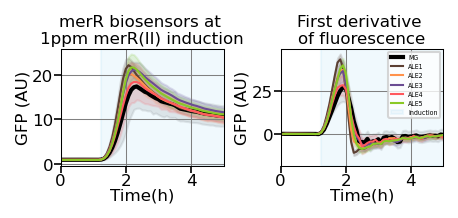

In [4]:
# Create figure 
fig, axes = plt.subplots(1, 2, facecolor="white")
fig.set_figheight(1.3)
fig.set_figwidth(2.9)

# Define palette, strains, custom x-ticks [frames every 5min] 
custom_palette = {
    "ALE1": "#5C4033",
    "ALE2": "#ff924c",
    "ALE3": "#6a4c93",
    "ALE4": "#ff595e",
    "ALE5": "#8ac926",
}

# Column "strains" (e.g., MG, ALE1..ALE5); preserves your original selection
strains = merR_df.columns.unique()

# Convert frame index to time in hours (frames spaced every 5 minutes; index starts at 1)
custom_xticks = ((merR_df.index.values.astype(float) - 1) * 5) / 60


# Plot time traces 
ax = axes[0]

for i in strains:
    # Mean trace across replicates, smoothed for display
    mean_trace = merR_df[i].mean(axis=1)
    smoothed_mean = savgol_filter(mean_trace, 5, 3)

    # Plot styling: MG thicker black line; others colored and thinner
    if i == "MG":
        ax.plot(custom_xticks, smoothed_mean, label=i, linewidth=2, color="black")
    else:
        ax.plot(
            custom_xticks,
            smoothed_mean,
            label=i,
            linewidth=1,
            color=custom_palette[i],
        )

    # Shaded region: +/- 1 standard deviation (computed on the unsmoothed mean/std)
    std_dev = merR_df[i].std(axis=1)
    upper_bound = mean_trace + std_dev
    lower_bound = mean_trace - std_dev

    if i == "MG":
        ax.fill_between(
            x=custom_xticks,
            y1=upper_bound,
            y2=lower_bound,
            alpha=0.2,
            color="grey",
        )
    else:
        ax.fill_between(
            x=custom_xticks,
            y1=upper_bound,
            y2=lower_bound,
            alpha=0.2,
            color=custom_palette[i],
        )

# Mark induction period (same span, label, color, and alpha)
ax.axvspan(1.25, 5.25, label="Induction", color="#b6e1f6", alpha=0.2)

# Set x and y tick label sizes (kept identical approach)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)

# Axis titles and labels
ax.set_title("merR biosensors at \n1ppm merR(II) induction", size=8, pad=2.5)
ax.set_xlabel("Time(h)", size=8, labelpad=0)
ax.set_ylabel("GFP (AU)", size=8, labelpad=1)
ax.tick_params(axis="x", labelsize=8, pad=0)
ax.tick_params(axis="y", labelsize=8, pad=0)

# Grid styling and axis limits
ax.grid(visible=True, axis="both", color="grey", linewidth=0.5)
ax.set_xlim(0, 5)


# Plot first derivative
merR_df_diff = pd.DataFrame()
ax = axes[1]

for i in strains:
    # Smooth the mean trace, then compute first derivative w.r.t. time
    data = savgol_filter(merR_df[i].mean(axis=1), 5, 3)
    derivative = np.diff(data) / np.diff(custom_xticks)

    # Store derivative trace (same behavior)
    merR_df_diff[i] = derivative

    # Plot styling: MG thicker black line; others colored and thinner
    if i == "MG":
        ax.plot(custom_xticks[1:], derivative, label=i, linewidth=2, color="black")
    else:
        ax.plot(
            custom_xticks[1:],
            derivative,
            label=i,
            linewidth=1,
            color=custom_palette[i],
        )

    # Shaded region: derivative +/- std dev of replicate differences
    std_dev = np.diff(merR_df[i]).std(axis=1)
    upper_bound = derivative + std_dev[1:]
    lower_bound = derivative - std_dev[1:]

    if i == "MG":
        ax.fill_between(
            x=custom_xticks[1:],
            y1=upper_bound,
            y2=lower_bound,
            alpha=0.2,
            color="grey",
        )
    else:
        ax.fill_between(
            x=custom_xticks[1:],
            y1=upper_bound,
            y2=lower_bound,
            alpha=0.2,
            color=custom_palette[i],
        )

# Mark induction period
ax.axvspan(1.25, 5.25, label="Induction", color="#b6e1f6", alpha=0.2)

# Axis titles and labels
ax.set_title("First derivative \nof fluorescence", size=8, pad=2.5)
ax.set_xlabel("Time(h)", size=8, labelpad=0)
ax.set_ylabel("GFP (AU)", size=8, labelpad=1)
ax.tick_params(axis="x", labelsize=8, pad=0)
ax.tick_params(axis="y", labelsize=8, pad=0)

# Grid styling and axis limits
ax.grid(visible=True, axis="both", color="grey", linewidth=0.5)
ax.set_xlim(0, 5)

# Set x and y tick label sizes 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)


# Adjust axes and subplots 
# Thin axis spines to match original styling
for ax in axes.flat:
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

# Legend and subplot spacing 
plt.legend(fontsize=3)
plt.subplots_adjust(left=0.12, right=1, bottom=0.2, top=0.8, wspace=0.35, hspace=0.4)


### Dynamic characterization

#### Fluorescence fold-change 

/var/folders/r4/n0pt1c0x7ql2s2xvp0l_fsl00000gn/T/ipykernel_31291/1477077231.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(custom_xticks)


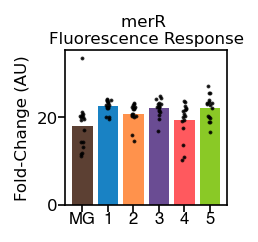

In [5]:
# Define stats dataframe and strains 

# DataFrame to store per-replicate maximum GFP values for each strain
merR_df_max = pd.DataFrame(columns=["strain", "max_gfp"])

# Desired strain order for plotting and categorical sorting
strains = ["MG", "ALE1", "ALE2", "ALE3", "ALE4", "ALE5"]


# Iterate through each column and calculate max value 
# merR_df has columns keyed by strain (each value is a replicate/time series table)
for column_name, column_values in merR_df.items():
    # Max across the entire column_values object
    max_value = column_values.max()

    # Append as a new row
    new_row = {"strain": column_name, "max_gfp": max_value}
    merR_df_max.loc[len(merR_df_max.index)] = new_row

# Aggregate: mean and std of the max GFP values per strain
data_merR = merR_df_max.groupby("strain", as_index=False).agg(
    mean=("max_gfp", "mean"),
    std=("max_gfp", "std"),
)

# Reorder strains using an explicit categorical type 
cat_order = CategoricalDtype(categories=strains, ordered=True)
data_merR["strain"] = data_merR["strain"].astype(cat_order)
data_merR = data_merR.sort_values("strain")


# Create figures 
fig, ax = plt.subplots(1, 1, constrained_layout=True, facecolor="white")
fig.set_figheight(1.5)
fig.set_figwidth(1.5)


# Graph merR fluorescence response 
palette_dict = {
    "MG": "#5C4033",
    "ALE1": "#1982c4",
    "ALE2": "#ff924c",
    "ALE3": "#6a4c93",
    "ALE4": "#ff595e",
    "ALE5": "#8ac926",
}

# Color bars according to the strain palette and current ordering in data_merR
colors = [palette_dict[strain] for strain in data_merR["strain"]]
ax.bar(data_merR["strain"], data_merR["mean"], color=colors)

# Add scattered points (individual replicates)
# Points are jittered around integer x-positions (i) to avoid overlap
for i, strain in enumerate(strains):
    y_vals = merR_df_max[merR_df_max["strain"] == strain]["max_gfp"]
    x_vals = np.random.normal(loc=i, scale=0.05, size=len(y_vals))
    ax.scatter(x_vals, y_vals, color="black", s=0.75, zorder=5, alpha=0.8)


# Formatting
custom_xticks = ["MG", "1", "2", "3", "4", "5"]
ax.set_xticklabels(custom_xticks)

ax.tick_params(axis="x", pad=0)
ax.tick_params(axis="y", pad=0)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)
    tick.label.set_fontname("Helvetica")

ax.set_title("merR \nFluorescence Response", size=8, pad=3)
ax.set_ylabel("Fold-Change (AU)", size=8, labelpad=3)
ax.set_xlabel("", size=8)

plt.show()


#### Maximum response rate

/var/folders/r4/n0pt1c0x7ql2s2xvp0l_fsl00000gn/T/ipykernel_31291/1986515371.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(custom_xticks)


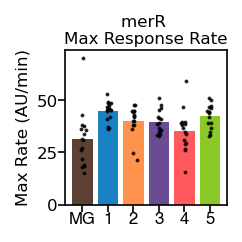

In [6]:
# Define first-derivative dataframe and time axis

# DataFrame to store first-derivative traces for each strain
merR_df_diff = pd.DataFrame()

# Convert frame index to time in hours (frames spaced every 5 minutes; index starts at 1)
slices = ((merR_df.index.values.astype(float) - 1) * 5) / 60


# Iterate through each column and calculate first derivative
# merR_df has columns keyed by strain (each value is a replicate/time series table)
for cname, cvals in merR_df.items():
    # Smooth the replicate/time series table, then compute derivative w.r.t. time
    data = savgol_filter(cvals, 5, 3)
    derivative = np.diff(data) / np.diff(slices)

    # Store derivative as a one-column dataframe, then concat 
    temp_df = pd.DataFrame()
    temp_df[cname] = derivative
    merR_df_diff = pd.concat([merR_df_diff, temp_df], axis=1)


# Iterate through each column and calculate max response rate
# Collect the maximum derivative value per strain (per replicate set)
merR_df_diff_max = pd.DataFrame(columns=["strain", "max_gfp_diff"])

for column_name, column_values in merR_df_diff.items():
    # Max across the entire derivative trace
    max_value = column_values.max()

    # Append as a new row
    new_row = {"strain": column_name, "max_gfp_diff": max_value}
    merR_df_diff_max.loc[len(merR_df_diff_max.index)] = new_row

# Aggregate: mean and std of the max derivative values per strain
data_merR = merR_df_diff_max.groupby("strain", as_index=False).agg(
    mean=("max_gfp_diff", "mean"),
    std=("max_gfp_diff", "std"),
)

# Reorder strains using an explicit categorical type
cat_order = CategoricalDtype(categories=strains, ordered=True)
data_merR["strain"] = data_merR["strain"].astype(cat_order)
data_merR = data_merR.sort_values("strain")


# Create figures
fig, ax = plt.subplots(1, 1, constrained_layout=True, facecolor="white")
fig.set_figheight(1.5)
fig.set_figwidth(1.5)


# Graph merR max response rate
palette_dict = {
    "MG": "#5C4033",
    "ALE1": "#1982c4",
    "ALE2": "#ff924c",
    "ALE3": "#6a4c93",
    "ALE4": "#ff595e",
    "ALE5": "#8ac926",
}

# Color bars according to the strain palette and current ordering in data_merR
colors = [palette_dict[strain] for strain in data_merR["strain"]]
ax.bar(data_merR["strain"], data_merR["mean"], color=colors)

# Add scattered points (individual replicates)
# Points are jittered around integer x-positions (i) to avoid overlap
for i, strain in enumerate(strains):
    y_vals = merR_df_diff_max[merR_df_diff_max["strain"] == strain]["max_gfp_diff"]
    x_vals = np.random.normal(loc=i, scale=0.05, size=len(y_vals))
    ax.scatter(x_vals, y_vals, color="black", s=0.75, zorder=5, alpha=0.8)


# Formatting
custom_xticks = ["MG", "1", "2", "3", "4", "5"]
ax.set_xticklabels(custom_xticks)

ax.tick_params(axis="x", pad=0)
ax.tick_params(axis="y", pad=0)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)
    tick.label.set_fontname("Helvetica")

ax.set_title("merR \nMax Response Rate", size=8, pad=3)
ax.set_ylabel("Max Rate (AU/min)", size=8, labelpad=3)
ax.set_xlabel("", size=8)

plt.show()


#### Relaxation rate

In [7]:
# First-order equation 
def firstOrder_func(X, T):
    return I * np.exp(-X/T)

/var/folders/r4/n0pt1c0x7ql2s2xvp0l_fsl00000gn/T/ipykernel_31291/3415441055.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(custom_xticks)


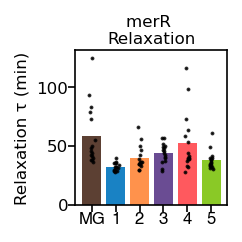

In [8]:
# Convert frame index to time in hours (frames spaced every 5 minutes; index starts at 1)
slices = ((merR_df.index.values.astype(float) - 1) * 5) / 60

# DataFrame to store relaxation fit parameter for each strain/replicate set
merR_df_relax = pd.DataFrame(columns=["strain", "relax"])


# Iterate through each column and calculate relaxation time constant
# Fits first-order model over a window defined as "4 hours after induction" 
lim = 4

for cname, cvals in merR_df.items():

    # Time axis in hours 
    x = ((merR_df.index.values.astype(float) - 1) * 5) / 60

    # Smoothed fluorescence trace (same filter params)
    y = savgol_filter(cvals, 5, 3)

    # Start fit window at maximum response
    start = np.argmax(y)

    # End fit window at the number of timepoints where x < lim 
    end = len(x[x < lim])

    # Slice the trace and redefine x as a simple 0..N linspace 
    y = y[start:end]
    x = np.linspace(0, len(y), len(y))

    # Initial value 
    I = y[0]

    # Fit and store relaxation parameter
    popt, pcov = curve_fit(firstOrder_func, x, y)
    new_row = {"strain": cname, "relax": popt[0]}
    merR_df_relax.loc[len(merR_df_relax.index)] = new_row

# Aggregate: mean and std of relaxation parameter per strain
data_merR = merR_df_relax.groupby("strain", as_index=False).agg(
    mean=("relax", "mean"),
    std=("relax", "std"),
)

# Reorder strains using an explicit categorical type
cat_order = CategoricalDtype(categories=strains, ordered=True)
data_merR["strain"] = data_merR["strain"].astype(cat_order)
data_merR = data_merR.sort_values("strain")


# Create figures
fig, ax = plt.subplots(1, 1, constrained_layout=True, facecolor="white")
fig.set_figheight(1.5)
fig.set_figwidth(1.5)

# Graph merR relaxation
palette_dict = {
    "MG": "#5C4033",
    "ALE1": "#1982c4",
    "ALE2": "#ff924c",
    "ALE3": "#6a4c93",
    "ALE4": "#ff595e",
    "ALE5": "#8ac926",
}

# Color bars according to the strain palette and current ordering in data_merR
colors = [palette_dict[strain] for strain in data_merR["strain"]]
ax.bar(data_merR["strain"], data_merR["mean"], color=colors)

# Add scattered points (individual replicates)
# Points are jittered around integer x-positions (i) to avoid overlap
for i, strain in enumerate(strains):
    y_vals = merR_df_relax[merR_df_relax["strain"] == strain]["relax"]
    x_vals = np.random.normal(loc=i, scale=0.05, size=len(y_vals))
    ax.scatter(x_vals, y_vals, color="black", s=0.75, zorder=5, alpha=0.8)


# Formatting
custom_xticks = ["MG", "1", "2", "3", "4", "5"]
ax.set_xticklabels(custom_xticks)

ax.tick_params(axis="x", pad=0)
ax.tick_params(axis="y", pad=0)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)
    tick.label.set_fontname("Helvetica")

ax.set_title("merR \nRelaxation", size=8, pad=3)
ax.set_ylabel("Relaxation τ (min)", size=8, labelpad=3)
ax.set_xlabel("", size=8)

plt.show()


### Multistrain characterization

In [36]:
# Read in all other strain time traces from microfluidics expt 
zntA_df = pd.read_csv('zntAtoPb_multistrain.csv', index_col=0)
arsR_df = pd.read_csv('arsRtoAs_multistrain.csv', index_col=0)
cadC_df = pd.read_csv('cadCtoCd_multistrain.csv', index_col=0)
cusC_df = pd.read_csv('cusCtoCu_multistrain.csv', index_col=0)
zraP_df = pd.read_csv('zraPtoPb_multistrain.csv', index_col=0)

/Users/alyssachiang/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


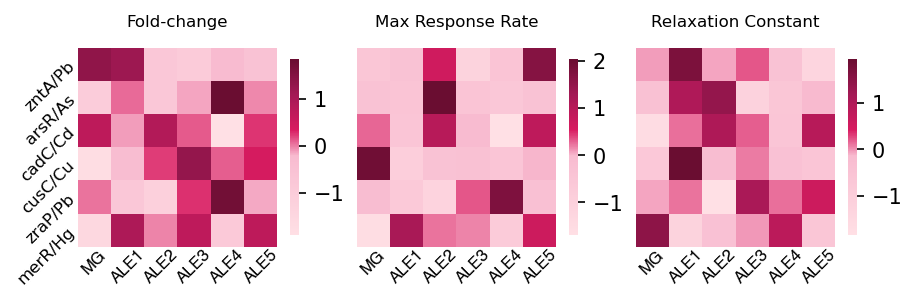

In [37]:
# Heatmap of dfs, slope, and relaxation for all biosensors/strains

# Containers for computed metrics (rows will align to `strains`, columns to biosensors)
dfs_all = pd.DataFrame()
slopes_all = pd.DataFrame()
relax_all = pd.DataFrame()

# Dictionary of biosensor time-series dataframes
dfs = {
    "zntA": zntA_df,
    "arsR": arsR_df,
    "cadC": cadC_df,
    "cusC": cusC_df,
    "zraP": zraP_df,
}

# Desired strain order (used throughout)
strains = ["MG", "ALE1", "ALE2", "ALE3", "ALE4", "ALE5"]


# Parse through each biosensor dataframe and compute:
# 1) max dfs (max smoothed mean trace)
# 2) max ramp rate (max of smoothed mean first derivative)
# 3) relaxation constant (first-order fit after peak)
for i in dfs:
    dfs_max = []
    dfs_slope = []
    dfs_relax = []

    # Parse through each strain in the dataframe
    for j in strains:
        # Filter rows corresponding to this strain name (index contains strain ID)
        filtered_df = dfs[i][dfs[i].index.str.contains(j)]

        # --- Maximum dfs (max of smoothed mean trace) ---
        dfs_max.append(savgol_filter(filtered_df.mean(), 5, 3).max())

        # --- Maximum ramp rate (max of first derivative) ---
        filtered_df_diff = pd.DataFrame()

        # Iterate across each row trace (transpose so each original row is a "series" in .items())
        for cname, cvals in filtered_df.T.items():
            data = cvals
            custom_xticks = ((filtered_df.T.index.values.astype(float) - 1) * 5) / 60
            derivative = np.diff(data) / np.diff(custom_xticks)

            temp_df = pd.DataFrame()
            temp_df[cname] = derivative
            filtered_df_diff = pd.concat([filtered_df_diff, temp_df], axis=1)

        slope = savgol_filter(filtered_df_diff.T.mean(), 5, 3).max()
        dfs_slope.append(slope)

        # --- Relaxation constant (first-order fit after max) ---
        lim = 24
        x = np.array(filtered_df.columns)
        y = np.array(filtered_df.mean())

        start = np.argmax(y)
        end = start + lim

        y = y[start:end]
        x = np.linspace(0, len(y), len(y))

        # Initial value (computed but not used; keeping to preserve behavior)
        I = y[0]

        popt, pcov = curve_fit(firstOrder_func, x, y)
        dfs_relax.append(popt[0])

    # Store results as columns keyed by biosensor name
    dfs_all[i] = dfs_max
    slopes_all[i] = dfs_slope
    relax_all[i] = dfs_relax


# Add in previously calculated merR measurements from above 
merR_dfs = []
merR_slope = []
merR_relax = []

for i in strains:
    merR_max = merR_df_max.loc[merR_df_max["strain"] == i]["max_gfp"].mean()
    merR_dfs.append(merR_max)

    merR_ramp = merR_df_diff_max.loc[merR_df_diff_max["strain"] == i]["max_gfp_diff"].mean()
    merR_slope.append(merR_ramp)

    merR_relaxrate = merR_df_relax.loc[merR_df_relax["strain"] == i]["relax"].mean()
    merR_relax.append(merR_relaxrate)

dfs_all["merR"] = merR_dfs
slopes_all["merR"] = merR_slope
relax_all["merR"] = merR_relax


# Initialize dataframes for standardization
ALL_dfs_df = {"dfs_all": dfs_all, "slopes_all": slopes_all, "relax_all": relax_all}

dfs_all_std = pd.DataFrame(columns=dfs_all.columns)
slopes_all_std = pd.DataFrame(columns=slopes_all.columns)
relax_all_std = pd.DataFrame(columns=relax_all.columns)

ALL_dfs_std = {"dfs_all": dfs_all_std, "slopes_all": slopes_all_std, "relax_all": relax_all_std}


# Standardize everything (z-score per column within each metric table)
for i in ALL_dfs_df:
    # Assign strain names to index 
    ALL_dfs_df[i].index = strains

    for j in ALL_dfs_df[i].columns:
        mean = ALL_dfs_df[i][j].mean()
        std = ALL_dfs_df[i][j].std()
        ALL_dfs_std[i][j] = (ALL_dfs_df[i][j] - mean) / std


# Rename biosensor columns for display
cols = ["zntA/Pb", "arsR/As", "cadC/Cd", "cusC/Cu", "zraP/Pb", "merR/Hg"]
for i in ALL_dfs_std:
    ALL_dfs_std[i].columns = cols


# Define non-linear colormap helper 
def NonLinCdict(steps, hexcol_array):
    cdict = {"red": (), "green": (), "blue": ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict["red"] = cdict["red"] + ((s, rgb[0], rgb[0]),)
        cdict["green"] = cdict["green"] + ((s, rgb[1], rgb[1]),)
        cdict["blue"] = cdict["blue"] + ((s, rgb[2], rgb[2]),)
    return cdict


# Colormap settings
hc = [
    "#FFE0E5",  # Soft Pink
    "#F8BBD0",  # Light Pastel Pink
    "#D81B60",  # Bright Magenta
    "#A31955",  # Rich Magenta
    "#6A0D31",  # Very Dark Magenta
]
th = [0, 0.45, 0.6, 0.8, 1]

cdict = NonLinCdict(th, hc)
cm = matplotlib.colors.LinearSegmentedColormap("test", cdict)


# Create heatmap figure
fig, axes = plt.subplots(1, 3, constrained_layout=True, sharey=False)
fig.set_figheight(4)
fig.set_figwidth(6)


# --- Heatmap: Foldchange ---
ax = axes[0]
sns.heatmap(dfs_all_std.T, cmap=cm, ax=ax, square=True, cbar_kws={"shrink": 0.3, "pad": 0.05})
ax.set_title("Fold-change", fontsize=8, pad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
ax.tick_params(axis="both", pad=0, length=0)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)
    tick.label.set_fontname("Helvetica")


# --- Heatmap: Response Rate ---
ax = axes[1]
sns.heatmap(slopes_all_std.T, cmap=cm, ax=ax, square=True, cbar_kws={"shrink": 0.3, "pad": 0.05})
ax.set_title("Max Response Rate", fontsize=8, pad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels("")
ax.tick_params(axis="both", pad=0, length=0)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)
    tick.label.set_fontname("Helvetica")


# --- Heatmap: Relaxation Constant ---
ax = axes[2]
sns.heatmap(relax_all_std.T, cmap=cm, ax=ax, square=True, cbar_kws={"shrink": 0.3, "pad": 0.05})
ax.set_title("Relaxation Constant", fontsize=8, pad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels("")
ax.tick_params(axis="both", pad=0, length=0)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(8)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(8)
    tick.label.set_fontname("Helvetica")


### Time series 

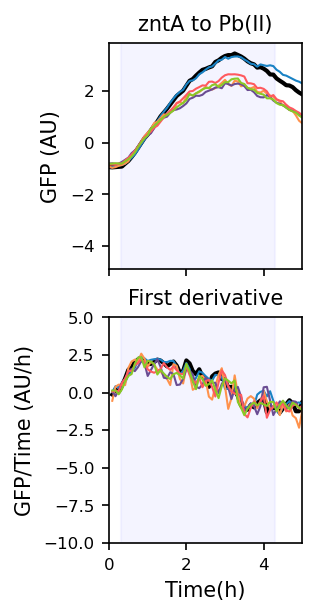

In [60]:
# --- Load and format data (transpose so strains are columns) ---
zntA_df = pd.read_csv('./zntAtoPb_multistrain.csv', index_col=0).T

# --- Figure setup (keep identical layout/size) ---
fig, axes = plt.subplots(2, 1, constrained_layout=True, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(2)

# Color palette for non-MG strains (order matters)
custom_palette = sns.color_palette(['#1982c4', '#ff924c', '#6a4c93', '#ff595e', '#8ac926'])

# Strain names and x-axis in hours: ((t-1)*5 minutes) / 60
strains = zntA_df.columns.unique()
custom_xticks = ((zntA_df.index.values.astype(float) - 1) * 5) / 60

# --- Panel 1: GFP time traces ---
ax = axes[0]
for strain in strains:
    mean_trace = np.array(zntA_df[strain].mean(axis=1))

    if strain == 'MG':
        ax.plot(custom_xticks, mean_trace, label=strain, linewidth=2, color='black')
    else:
        palette_idx = int(np.where(strains == strain)[0][0]) - 1
        ax.plot(custom_xticks, mean_trace, label=strain, linewidth=1, color=custom_palette[palette_idx])

ax.set_ylabel('GFP (AU)', size=10)
ax.set_title('zntA to Pb(II)', size=10)
ax.set_xlim(0, 5)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.axvspan(0.3, 4.3, label="Induction", color="#CCCCFF", alpha=0.2)

# --- Panel 2: First derivative (dGFP/dt) ---
ax = axes[1]
for strain in strains:
    mean_trace = np.array(zntA_df[strain].mean(axis=1))
    derivative = np.diff(mean_trace) / np.diff(custom_xticks)
    derivative = savgol_filter(derivative,5,3)

    if strain == 'MG':
        ax.plot(custom_xticks[1:], derivative, label=strain, linewidth=2, color='black')
    else:
        palette_idx = int(np.where(strains == strain)[0][0]) - 1
        ax.plot(custom_xticks[1:], derivative, label=strain, linewidth=1, color=custom_palette[palette_idx])

ax.set_xlabel('Time(h)', size=10)
ax.set_ylabel('GFP/Time (AU/h)', size=10)
ax.set_title('First derivative', size=10)
ax.set_xlim(0, 5)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.axvspan(0.3, 4.3, label="Induction", color="#CCCCFF", alpha=0.2)
ax.set_ylim(-10,5)


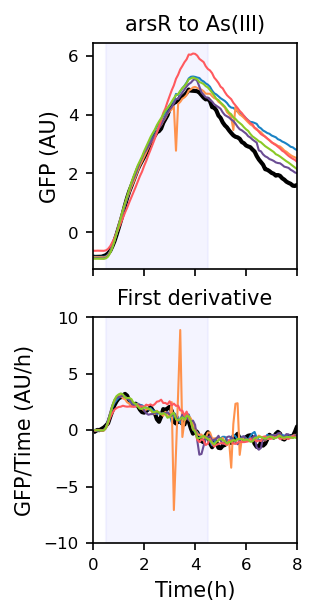

In [58]:
# --- Load and format data (transpose so strains are columns) ---
arsR_df = pd.read_csv('./arsRtoAs_multistrain.csv', index_col=0).T

# --- Figure setup (keep identical layout/size) ---
fig, axes = plt.subplots(2, 1, constrained_layout=True, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(2)

# Color palette for non-MG strains (order matters)
custom_palette = sns.color_palette(['#1982c4', '#ff924c', '#6a4c93', '#ff595e', '#8ac926'])

# Strain names and x-axis in hours: ((t-1)*5 minutes) / 60
strains = arsR_df.columns.unique()
custom_xticks = ((arsR_df.index.values.astype(float) - 1) * 5) / 60

# --- Panel 1: GFP time traces ---
ax = axes[0]
for strain in strains:
    mean_trace = np.array(arsR_df[strain].mean(axis=1))

    if strain == 'MG':
        ax.plot(custom_xticks, mean_trace, label=strain, linewidth=2, color='black')
    else:
        palette_idx = int(np.where(strains == strain)[0][0]) - 1
        ax.plot(custom_xticks, mean_trace, label=strain, linewidth=1, color=custom_palette[palette_idx])

ax.set_ylabel('GFP (AU)', size=10)
ax.set_title('arsR to As(III)', size=10)
ax.set_xlim(0, 8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.axvspan(0.5, 4.5, label="Induction", color="#CCCCFF", alpha=0.2)

# --- Panel 2: First derivative (dGFP/dt) ---
ax = axes[1]
for strain in strains:
    mean_trace = np.array(arsR_df[strain].mean(axis=1))
    derivative = np.diff(mean_trace) / np.diff(custom_xticks)
    derivative = savgol_filter(derivative,5,3)

    if strain == 'MG':
        ax.plot(custom_xticks[1:], derivative, label=strain, linewidth=2, color='black')
    else:
        palette_idx = int(np.where(strains == strain)[0][0]) - 1
        ax.plot(custom_xticks[1:], derivative, label=strain, linewidth=1, color=custom_palette[palette_idx])

ax.set_xlabel('Time(h)', size=10)
ax.set_ylabel('GFP/Time (AU/h)', size=10)
ax.set_title('First derivative', size=10)
ax.set_xlim(0, 8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.axvspan(0.5, 4.5, label="Induction", color="#CCCCFF", alpha=0.2)
ax.set_ylim(-10,10)


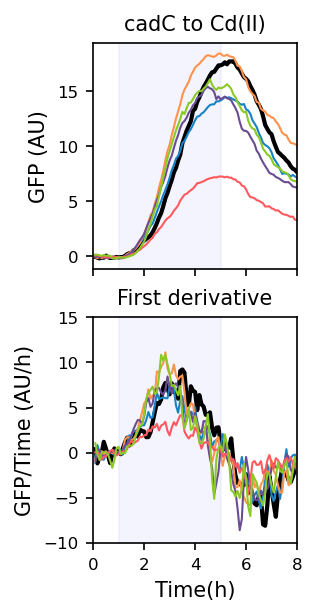

In [57]:
# --- Load and format data (transpose so strains are columns) ---
cadC_df = pd.read_csv('./cadCtoCd_multistrain.csv', index_col=0).T

# --- Figure setup (keep identical layout/size) ---
fig, axes = plt.subplots(2, 1, constrained_layout=True, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(2)

# Color palette for non-MG strains (order matters)
custom_palette = sns.color_palette(['#1982c4', '#ff924c', '#6a4c93', '#ff595e', '#8ac926'])

# Strain names and x-axis in hours: ((t-1)*5 minutes) / 60
strains = cadC_df.columns.unique()
custom_xticks = ((cadC_df.index.values.astype(float) - 1) * 5) / 60

# --- Panel 1: GFP time traces ---
ax = axes[0]
for strain in strains:
    mean_trace = np.array(cadC_df[strain].mean(axis=1))

    if strain == 'MG':
        ax.plot(custom_xticks, mean_trace, label=strain, linewidth=2, color='black')
    else:
        palette_idx = int(np.where(strains == strain)[0][0]) - 1
        ax.plot(custom_xticks, mean_trace, label=strain, linewidth=1, color=custom_palette[palette_idx])

ax.set_ylabel('GFP (AU)', size=10)
ax.set_title('cadC to Cd(II)', size=10)
ax.set_xlim(0, 8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.axvspan(1, 5, label="Induction", color="#CCCCFF", alpha=0.2)

# --- Panel 2: First derivative (dGFP/dt) ---
ax = axes[1]
for strain in strains:
    mean_trace = np.array(cadC_df[strain].mean(axis=1))
    derivative = np.diff(mean_trace) / np.diff(custom_xticks)
    derivative = savgol_filter(derivative,5,3)

    if strain == 'MG':
        ax.plot(custom_xticks[1:], derivative, label=strain, linewidth=2, color='black')
    else:
        palette_idx = int(np.where(strains == strain)[0][0]) - 1
        ax.plot(custom_xticks[1:], derivative, label=strain, linewidth=1, color=custom_palette[palette_idx])

ax.set_xlabel('Time(h)', size=10)
ax.set_ylabel('GFP/Time (AU/h)', size=10)
ax.set_title('First derivative', size=10)
ax.set_xlim(0, 8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.axvspan(1, 5, label="Induction", color="#CCCCFF", alpha=0.2)
ax.set_ylim(-10,15)


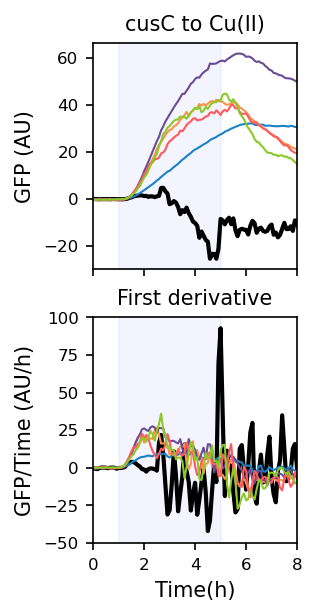

In [56]:
# --- Load and format data (transpose so strains are columns) ---
cusC_df = pd.read_csv('./cusCtoCu_multistrain.csv', index_col=0).T

# --- Figure setup (keep identical layout/size) ---
fig, axes = plt.subplots(2, 1, constrained_layout=True, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(2)

# Color palette for non-MG strains (order matters)
custom_palette = sns.color_palette(['#1982c4', '#ff924c', '#6a4c93', '#ff595e', '#8ac926'])

# Strain names and x-axis in hours: ((t-1)*5 minutes) / 60
strains = cusC_df.columns.unique()
custom_xticks = ((cusC_df.index.values.astype(float) - 1) * 5) / 60

# --- Panel 1: GFP time traces ---
ax = axes[0]
for strain in strains:
    mean_trace = np.array(cusC_df[strain].mean(axis=1))

    if strain == 'MG':
        ax.plot(custom_xticks, mean_trace, label=strain, linewidth=2, color='black')
    else:
        palette_idx = int(np.where(strains == strain)[0][0]) - 1
        ax.plot(custom_xticks, mean_trace, label=strain, linewidth=1, color=custom_palette[palette_idx])

ax.set_ylabel('GFP (AU)', size=10)
ax.set_title('cusC to Cu(II)', size=10)
ax.set_xlim(0, 8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.axvspan(1, 5, label="Induction", color="#CCCCFF", alpha=0.2)

# --- Panel 2: First derivative (dGFP/dt) ---
ax = axes[1]
for strain in strains:
    mean_trace = np.array(cusC_df[strain].mean(axis=1))
    derivative = np.diff(mean_trace) / np.diff(custom_xticks)
    derivative = savgol_filter(derivative,5,3)

    if strain == 'MG':
        ax.plot(custom_xticks[1:], derivative, label=strain, linewidth=2, color='black')
    else:
        palette_idx = int(np.where(strains == strain)[0][0]) - 1
        ax.plot(custom_xticks[1:], derivative, label=strain, linewidth=1, color=custom_palette[palette_idx])

ax.set_xlabel('Time(h)', size=10)
ax.set_ylabel('GFP/Time (AU/h)', size=10)
ax.set_title('First derivative', size=10)
ax.set_xlim(0, 8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.axvspan(1, 5, label="Induction", color="#CCCCFF", alpha=0.2)
ax.set_ylim(-50,100)


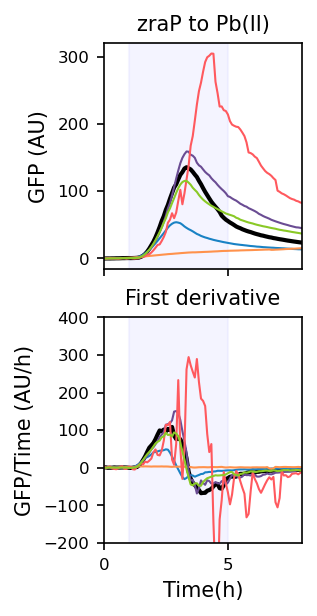

In [55]:
# --- Load and format data (transpose so strains are columns) ---
zraP_df = pd.read_csv('./zraPtoPb_multistrain.csv', index_col=0).T

# --- Figure setup (keep identical layout/size) ---
fig, axes = plt.subplots(2, 1, constrained_layout=True, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(2)

# Color palette for non-MG strains (order matters)
custom_palette = sns.color_palette(['#1982c4', '#ff924c', '#6a4c93', '#ff595e', '#8ac926'])

# Strain names and x-axis in hours: ((t-1)*5 minutes) / 60
strains = zraP_df.columns.unique()
custom_xticks = ((zraP_df.index.values.astype(float) - 1) * 5) / 60

# --- Panel 1: GFP time traces ---
ax = axes[0]
for strain in strains:
    mean_trace = np.array(zraP_df[strain].mean(axis=1))

    if strain == 'MG':
        ax.plot(custom_xticks, mean_trace, label=strain, linewidth=2, color='black')
    else:
        palette_idx = int(np.where(strains == strain)[0][0]) - 1
        ax.plot(custom_xticks, mean_trace, label=strain, linewidth=1, color=custom_palette[palette_idx])

ax.set_ylabel('GFP (AU)', size=10)
ax.set_title('zraP to Pb(II)', size=10)
ax.set_xlim(0, 8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.axvspan(1, 5, label="Induction", color="#CCCCFF", alpha=0.2)

# --- Panel 2: First derivative (dGFP/dt) ---
ax = axes[1]
for strain in strains:
    mean_trace = np.array(zraP_df[strain].mean(axis=1))
    derivative = np.diff(mean_trace) / np.diff(custom_xticks)
    derivative = savgol_filter(derivative,5,3)

    if strain == 'MG':
        ax.plot(custom_xticks[1:], derivative, label=strain, linewidth=2, color='black')
    else:
        palette_idx = int(np.where(strains == strain)[0][0]) - 1
        ax.plot(custom_xticks[1:], derivative, label=strain, linewidth=1, color=custom_palette[palette_idx])

ax.set_xlabel('Time(h)', size=10)
ax.set_ylabel('GFP/Time (AU/h)', size=10)
ax.set_title('First derivative', size=10)
ax.set_xlim(0, 8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.axvspan(1, 5, label="Induction", color="#CCCCFF", alpha=0.2)
ax.set_ylim(-200,400)
